# Global Communication in the MMR Data 

In [1]:
import snap
from snap import TUNGraph
import os
import sys
import operator
import pandas as pd
import subprocess
import numpy as np
import csv
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
from __future__ import print_function
from IPython.display import HTML, display
import tabulate
import json
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from collections import Counter
import re
from itertools import combinations

# Set Seaborn defaults
sns.set()
%matplotlib inline
pd.set_option("display.precision", 6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.autolayout'] = True

In [7]:
def read_large_file(file_object):
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data.rstrip('\n')
        
def process_edge_line(line):
    _, _, prop = line.split(',')
    return [int(p) for p in prop.split(';')]

In [8]:
P = np.zeros(shape=(13,), dtype=np.uint64)

In [9]:
count = 0
tot_lines = !wc -l ../data/mmr_encoded_final.csv
tot_lines = int(tot_lines[0].split()[0])
checkpoint = tot_lines/10
with open("../data/mmr_encoded_final.csv") as fin:
    for line in read_large_file(fin):
        periods = process_edge_line(line)
        count+=1
        if count % checkpoint == 0:
            print("Processed %d lines..." %count)
        for p in periods:
            P[p] += 1
print("Done!")

Processed 43419395 lines...
Processed 86838790 lines...
Processed 130258185 lines...
Processed 173677580 lines...
Processed 217096975 lines...
Processed 260516370 lines...
Processed 303935765 lines...
Processed 347355160 lines...
Processed 390774555 lines...
Processed 434193950 lines...
Done!


/home/s161155/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


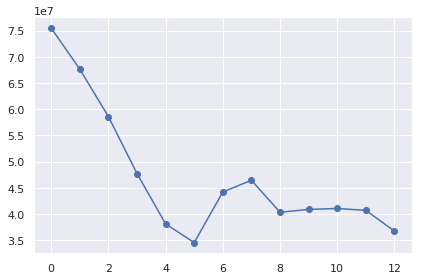

In [12]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,6)
fig.set_dpi(100)
ax.set_title("Total Communication by period in the MMR data", fontsize=14)
fig.set_tight_layout(False)
ax.plot(np.arange(13),P,'bo-')
ax.set_xticks(np.arange(0,13))
ax.set_xlabel("Period Index", fontsize=10, fontweight="bold")
ax.set_ylabel("Relative Frequency", fontsize=10, fontweight="bold")
plt.savefig(os.path.join(pictures_path,"intensity_communication_by_period.png"))
plt.show()